In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")              
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [5]:
df.sample(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
3700,3252,Dianna,Gilmore,NaN,1460858903,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1460858903,0.0,15718,3252,Dianna,Gilmore,NaN,15718,NaN,NaN,NaN,USD,NaN,100.10,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.05,NaN,fedex,11|Ground,NaN,NaN,NaN,6.49865E+13,3.0,1.460859e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Non-Padded-Bariatric-Transfer-Bench,0.0,CS,1 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,c0f5b78d-301d-2f10-e1a6-95d645f3becf,E0248,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,34.00,24.00,18.75,NaN,NaN,NaN,NaN,NaN,NaN,Blow-molded plastic,NaN,NaN,NaN,PF04724,0.0,NaN
958,802,Frank,Yost,NaN,1426101144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764261,0.0,3764,802,Frank,Yost,NaN,3764,NaN,Ebay,NaN,USD,NaN,60.62,3.86,0.00,NaN,NaN,NaN,NaN,NaN,0.09,Discount,16.50,48.07,0.03,manual,0|Free Shipping,NaN,NaN,NaN,1Z165YY60390278281,3.0,1.426101e+09,abe,NaN,Credit Card,...,Slip resistant portable shower bench with buil...,"portable shower bench,shower benches,shower be...",NaN,NaN,Portable-Shower-Bench,0.0,BX,NaN,NaN,NaN,30.5,14.5,5.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/12...,NaN,E0245,NaN,NaN,0.0,NaN,128.0,NaN,NaN,Limited Lifetime,1.0,NaN,Universal,Basic Assembly Required,Tool Free Installation,38.75,16.50,12.00,3.59,Ships Same Day,https://www.drivemedical.com/bathroom-safety/1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BS53,0.0,NaN
2003,1668,Tommy,Manning,NaN,1444332287,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1456953768,0.0,6917,1668,Tommy,Manning,NaN,6917,NaN,NaN,NaN,USD,NaN,41.79,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.74,NaN,fedex,11|Ground,NaN,NaN,NaN,1.49935E+13,3.0,1.444332e+09,abe,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Steel-Commode-With-Microban,0.0,CS,1 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,Yes,8.019655e+10,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,22.50,8.75,17.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF77410,0.0,NaN
3031,2598,Eleanor a,Williams,NaN,1456178158,NaN,1.0,NaN,NaN,Na

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [7]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df=df.dropna(axis=1, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [10]:
df = df.drop(["Orders.customer_id","Orders.fname","Orders.lname","Orders.order_number","Order_Items.parent"], axis=1)

In [11]:
df.head(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.product_name,Order_Items.qty,Order_Items.price
0,797,Christy,Dill,1426018724,1437764306,3758,USD,57.20,64.29,1,1426019099,5284,"Basic Rollators, Green",1,57.20
1,3,John,Smith,1386089139,1437764354,23,USD,20.00,29.99,1,1386090455,31,"Urinary Drain Bags,0.000",4,5.00
2,3,John,Smith,1386089139,1437764354,9531,USD,68.78,78.73,3,1449603652,11655,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78
3,4,James,Anderson,1386780263,1437762646,29,USD,19.56,29.55,1,1386780263,1816,Basket for 2-Button Walkers,1,19.56
4,5,Abraham,Pollak,1386861599,1437764316,30,USD,36.05,46.00,1,1386861599,40,Tens Units,1,36.05


In [12]:
df = df[["Customers.id","Order_Items.qty","Orders.total"]]

In [13]:
df = df.groupby("Customers.id", as_index=False).sum()

In [14]:
df.head()

,Customers.id,Order_Items.qty,Orders.total
0,3,5,108.72
1,4,1,29.55
2,5,3,124.99
3,7,1,49.14
4,8,1,69.70


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customers.id     3054 non-null   int64  
 1   Order_Items.qty  3054 non-null   int64  
 2   Orders.total     3054 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 95.4 KB


In [16]:
df=df.drop("Customers.id", axis=1)
df.head()

,Order_Items.qty,Orders.total
0,5,108.72
1,1,29.55
2,3,124.99
3,1,49.14
4,1,69.70


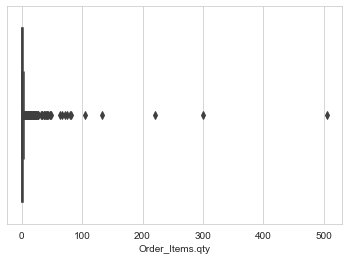

In [17]:
sns.boxplot(df["Order_Items.qty"]);

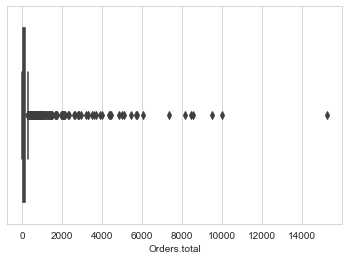

In [18]:
sns.boxplot(df["Orders.total"]);

In [19]:
df = df[df["Orders.total"] < 10000]
df = df[df["Order_Items.qty"] < 100]

In [20]:
model=KMeans(n_clusters = 7)
model=model.fit(df)

In [21]:
pred=model.predict(df)

In [22]:
pred

array([2, 2, 2, ..., 4, 2, 2], dtype=int32)

In [23]:
silhouette_score(df,pred)

0.6958587510098386

In [24]:
clust=df.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([2, 2, 2, ..., 4, 2, 2], dtype=int32)

No handles with labels found to put in legend.


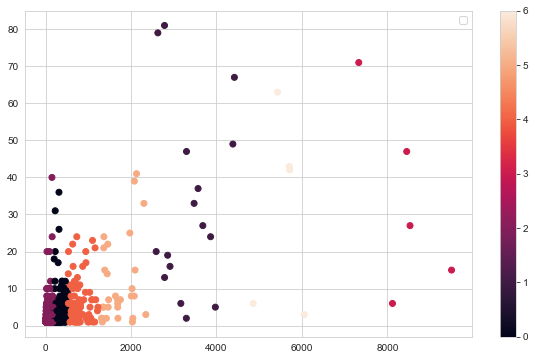

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df["Orders.total"],df["Order_Items.qty"],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [26]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df)
        score=silhouette_score(df,pred)
        sum_of_squared_distances.append(model.inertia_)
        print(f'Number of cluster {no_of_cluster}, silhoutte {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(14) # Score sabitlendiğinde durmamız gerekiyor.

Number of cluster 2, silhoutte 0.9600149283737868
Number of cluster 3, silhoutte 0.9283928296484226
Number of cluster 4, silhoutte 0.8497819141802514
Number of cluster 5, silhoutte 0.8144879562387252
Number of cluster 6, silhoutte 0.774000117153434
Number of cluster 7, silhoutte 0.6811502181894383
Number of cluster 8, silhoutte 0.6382291094360486
Number of cluster 9, silhoutte 0.6455372714729353
Number of cluster 10, silhoutte 0.6464002239550478
Number of cluster 11, silhoutte 0.6456800144782441
Number of cluster 12, silhoutte 0.6457120236799071
Number of cluster 13, silhoutte 0.6279461992003179
Number of cluster 14, silhoutte 0.6379435837518042


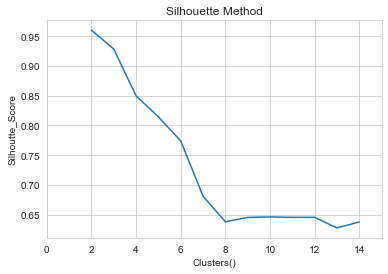

In [27]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

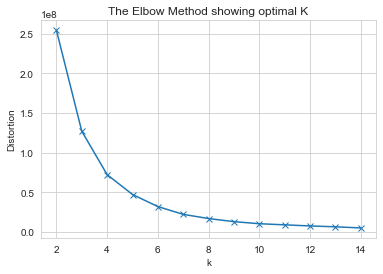

In [28]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()